![jupyter](./tasks/task4.png)

In [48]:
import math
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from prettytable import PrettyTable

np.set_printoptions(precision=7, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [49]:
x = [6, 2, 4, 5, 5, 4, 6, 5, 6, 4, 5, 4, 6, 8, 4, 3, 5, 7, 3, 4, 2, 8, 4, 4, 6, 6, 4, 5, 5, 4, 5, 6, 5, 6, 7, 4, 6,
 4, 3, 7, 3, 3, 7, 5, 6, 4, 4, 5, 4, 3, 6, 4, 4, 5, 5, 5, 5, 3, 7, 6, 5, 4, 6, 3, 3, 4, 3, 4, 4, 5, 6, 4, 5, 6,
 5, 5, 6, 5, 4, 5, 4, 4, 3, 5, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 4, 4, 6, 6, 4, 6, 5, 3, 5, 6, 6, 2, 4, 5, 6, 3, 5,
 3, 5, 2, 6, 6, 5, 4, 7, 6, 4, 6, 6, 3, 5, 4, 4, 6, 5, 5, 4, 5, 6, 4, 5, 6, 5, 5, 6, 7, 5, 7, 6, 4, 6, 6, 5, 6,
 6, 4, 3, 4, 5, 7, 4, 5, 7, 6, 4, 5, 4, 5, 4, 6, 6, 4, 6, 5, 4, 5, 6, 5, 3, 5, 3, 4, 6, 8, 4, 5]

k = 8
n = 180
print("Выборка:")
print("x =", x)

Выборка:
x = [6, 2, 4, 5, 5, 4, 6, 5, 6, 4, 5, 4, 6, 8, 4, 3, 5, 7, 3, 4, 2, 8, 4, 4, 6, 6, 4, 5, 5, 4, 5, 6, 5, 6, 7, 4, 6, 4, 3, 7, 3, 3, 7, 5, 6, 4, 4, 5, 4, 3, 6, 4, 4, 5, 5, 5, 5, 3, 7, 6, 5, 4, 6, 3, 3, 4, 3, 4, 4, 5, 6, 4, 5, 6, 5, 5, 6, 5, 4, 5, 4, 4, 3, 5, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 4, 4, 6, 6, 4, 6, 5, 3, 5, 6, 6, 2, 4, 5, 6, 3, 5, 3, 5, 2, 6, 6, 5, 4, 7, 6, 4, 6, 6, 3, 5, 4, 4, 6, 5, 5, 4, 5, 6, 4, 5, 6, 5, 5, 6, 7, 5, 7, 6, 4, 6, 6, 5, 6, 6, 4, 3, 4, 5, 7, 4, 5, 7, 6, 4, 5, 4, 5, 4, 6, 6, 4, 6, 5, 4, 5, 6, 5, 3, 5, 3, 4, 6, 8, 4, 5]


In [58]:
# Задание 1

K = sum(x)
print("Статистика K =",K)

Статистика K = 880


![jupyter](./pictures/task4-pic1.png)
![jupyter](./pictures/task4-pic2.png)

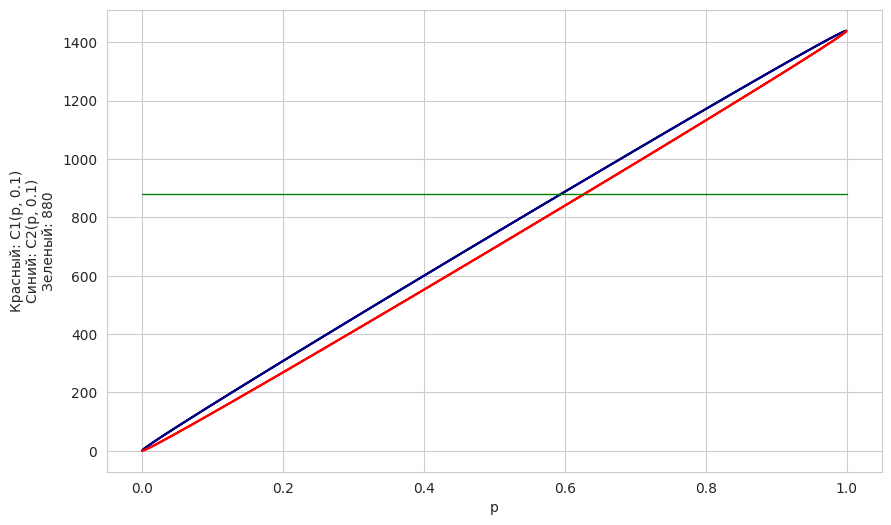

In [51]:
sb.set_style('whitegrid')

plt.figure(figsize=(10, 6))
p = np.arange(0, 1, 0.0001)
y1 = sp.stats.binom.ppf(0.9, n * k, p)
y2 = sp.stats.binom.ppf(0.1, n * k, p)
plt.plot(p, y1, color = 'navy')
plt.plot(p, y2, color = 'red')
plt.step([0,1],[K,K], linewidth = 1, color = "green")
plt.xlabel('p')
plt.ylabel('Красный: C1(p, 0.1)\nСиний: C2(p, 0.1)\nЗеленый: 880')
plt.show()

In [59]:
alpha1 = 0.1
p_down1 = sp.special.betaincinv(K, n * k - K + 1, alpha1 / 2)
p_up1 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha1 / 2))


alpha2 = 0.05
p_down2 = sp.special.betaincinv(K, n * k - K + 1, alpha2 / 2)
p_up2 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha2 / 2))


alpha3 = 0.02
p_down3 = sp.special.betaincinv(K, n * k - K + 1, alpha3 / 2)
p_up3 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha3 / 2))

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_down", p_down1, p_down2, p_down3,
     "p_up", p_up1, p_up2, p_up3])
print("Симметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p")
print_table(th, td)
print("Истинное значение p = 0.6 лежит в промежутке от p_down до p_up для разных alpha")

Cимметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p
+--------+--------------------+--------------------+--------------------+
| alpha  |        0.1         |        0.05        |        0.02        |
+--------+--------------------+--------------------+--------------------+
| p_down | 0.5894784770864632 | 0.5853789244412836 | 0.5806027941812529 |
|  p_up  | 0.6324073918087402 | 0.6363889889736587 | 0.6410024238739485 |
+--------+--------------------+--------------------+--------------------+
Истинное значение p = 0.6 лежит в промежутке от p_down до p_up для разных alpha


In [63]:
# Задание 2

par = K / (k * n)
alpha1 = 0.1
u = sp.stats.norm.ppf(1 - alpha1)
pl1 = par - u / (n ** 0.5) * (par * (1 - par)) ** 0.5
pr1 = par + u / (n ** 0.5) * (par * (1 - par)) ** 0.5

alpha2 = 0.05
u = sp.stats.norm.ppf(1 - alpha2)
pl2 = par - u / (n ** 0.5) * (par * (1 - par)) ** 0.5
pr2 = par + u / (n ** 0.5) * (par * (1 - par)) ** 0.5

alpha3 = 0.02
u = sp.stats.norm.ppf(1 - alpha3)
pl3 = par - u / (n ** 0.5) * (par * (1 - par)) ** 0.5
pr3 = par + u / (n ** 0.5) * (par * (1 - par)) ** 0.5

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_left", pl1, pl2, pl3,
     "p_right", pr1, pr2, pr3])
print("Приближенные доверительные интервалы для p (по ЦПТ)")
print_table(th, td)
print("Истинное значение p = 0.6 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ")

Приближенные доверительные интервалы для p (по ЦПТ)
+---------+--------------------+--------------------+--------------------+
|  alpha  |        0.1         |        0.05        |        0.02        |
+---------+--------------------+--------------------+--------------------+
|  p_left | 0.5645447083177807 | 0.5513437801757044 | 0.5364861786619792 |
| p_right | 0.6576775139044416 | 0.6708784420465179 | 0.6857360435602431 |
+---------+--------------------+--------------------+--------------------+
Истинное значение p = 0.6 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ


вероятности по формуле Бернули Probability =  [0.0012929 0.0134089 0.0608438 0.1577615 0.2556617 0.2651615 0.1718839
 0.0636681 0.0103178]
Кумулятивные вероятности cumulativeProbability =  [0.0012929 0.0147018 0.0755455 0.233307  0.4889687 0.7541302 0.9260141
 0.9896822 1.       ]
вероятности по формуле Бернули Probability =  [0.0001886 0.0028984 0.0194893 0.0748866 0.1798422 0.2764135 0.2655259
 0.1457526 0.0350029]
Кумулятивные вероятности cumulativeProbability =  [0.0001886 0.0030869 0.0225762 0.0974628 0.2773051 0.5537186 0.8192445
 0.9649971 1.       ]
вероятности по формуле Бернули Probability =  [0.0000656 0.0012247 0.0100019 0.0466754 0.1361367 0.2541218 0.2964755
 0.1976503 0.057648 ]
Кумулятивные вероятности cumulativeProbability =  [0.0000656 0.0012903 0.0112922 0.0579677 0.1941044 0.4482262 0.7447017
 0.942352  1.       ]


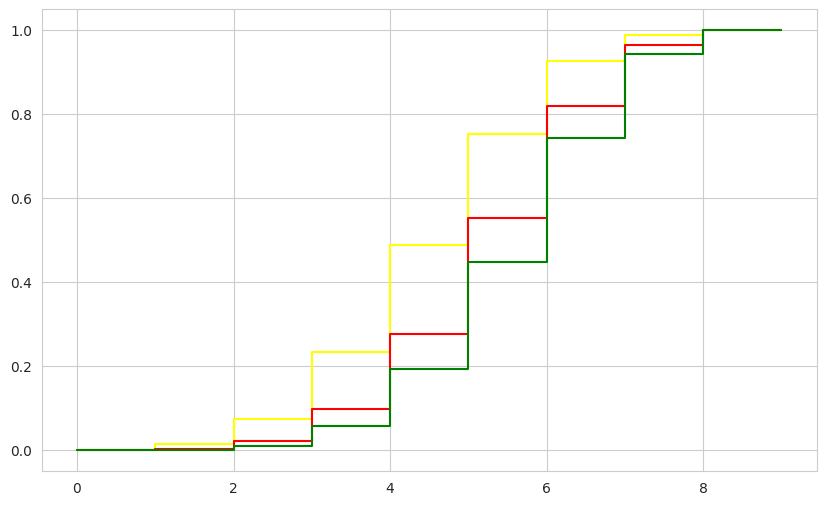

In [30]:
#считаем вероятности 
p = p_l1
Probability = np.array([])
for i in range(k + 1):
    Probability = np.append(Probability, math.comb(k,i) * p ** i * (1-p) ** (k - i))
print("вероятности по формуле Бернули Probability = ", Probability)

cumulativeProbability = np.array([])
_sum = 0
for element in Probability:
    _sum += element
    cumulativeProbability = np.append(cumulativeProbability, _sum) 
print("Кумулятивные вероятности cumulativeProbability = ", cumulativeProbability)

plt.figure(figsize=(10,6))
rg = np.arange(0,10,1)
plt.step(rg,[0] + cumulativeProbability.tolist() , color = 'yellow')

#считаем вероятности 
p = p_h1
Probability = np.array([])
for i in range(k + 1):
    Probability = np.append(Probability, math.comb(k,i) * p ** i * (1-p) ** (k - i))
print("вероятности по формуле Бернули Probability = ", Probability)

cumulativeProbability1 = np.array([])
_sum = 0
for element in Probability:
    _sum += element
    cumulativeProbability1 = np.append(cumulativeProbability1, _sum) 
print("Кумулятивные вероятности cumulativeProbability = ", cumulativeProbability1)
plt.step(rg,[0] + cumulativeProbability1.tolist(), color = 'red')

#считаем вероятности 
p = 0.7
Probability = np.array([])
for i in range(k + 1):
    Probability = np.append(Probability, math.comb(k,i) * p ** i * (1-p) ** (k - i))
print("вероятности по формуле Бернули Probability = ", Probability)

cumulativeProbability2 = np.array([])
_sum = 0
for element in Probability:
    _sum += element
    cumulativeProbability2 = np.append(cumulativeProbability2, _sum) 
print("Кумулятивные вероятности cumulativeProbability = ", cumulativeProbability2)
plt.step(rg,[0] + cumulativeProbability2.tolist(), color = 'green')
plt.show()